## Initialization

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import keras
import numpy as np
import pandas as pd
import seaborn as sns
import keras.utils
import keras.backend as K
from keras import optimizers
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop
from keras import utils as np_utils
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from keras.layers.advanced_activations import LeakyReLU

sns.set_style('whitegrid')

## Data Preprocessing

In [2]:
# Iris 

# load the Iris dataset and summarize the shape
from pandas import read_csv
# define the location of the dataset
url = r"C:\Users\User\Downloads\Compressed\Iris.csv"
# load the dataset
df_iris = read_csv(url)
# summarize shape
print("Shape of the dataset: " + str(df_iris.shape))

# Number of classes - Binary 
print("Number of classes: " + str(df_iris['Species'].unique()))
df_iris

Shape of the dataset: (150, 6)
Number of classes: ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


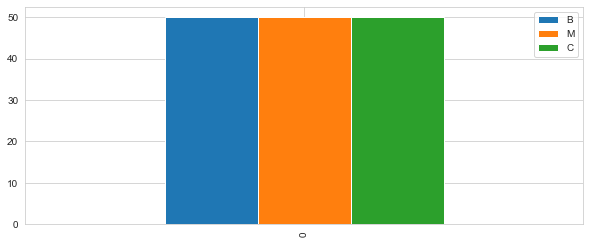

In [25]:
from sklearn.preprocessing import LabelEncoder

data_B = df_iris[df_iris['Species'] == 'Iris-setosa']
data_M = df_iris[df_iris['Species'] == 'Iris-versicolor']
data_C = df_iris[df_iris['Species'] == 'Iris-virginica']

B_M_data = {'B': [data_B.shape[0]], 'M': [data_M.shape[0]], 'C': [data_C.shape[0]]}
B_M_df = pd.DataFrame(data=B_M_data)
B_M_df.plot(kind='bar', figsize=(10,4))

scaler = MinMaxScaler()
# df_iris = df_iris.drop('Id', 1)
numerical = ['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']
df_iris[numerical] = scaler.fit_transform(df_iris[numerical])

X = df_iris.iloc[:,1:5].values
y = df_iris.iloc[:,5].values

encoder =  LabelEncoder()
y1 = encoder.fit_transform(y)

Y = pd.get_dummies(y1).values

# print(df.describe())
X_train_i, X_test_i, y_train_i, y_test_i = train_test_split(X, Y, test_size=0.25, random_state=42)



C:\Users\User\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


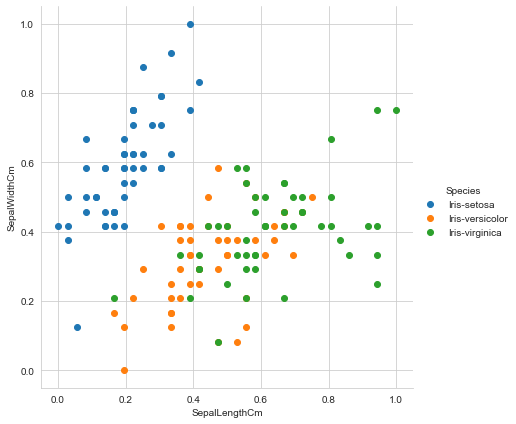

In [4]:
sns.set_style('whitegrid')
sns.FacetGrid(df_iris, hue = 'Species', size = 6)\
.map(plt.scatter, 'SepalLengthCm', 'SepalWidthCm')\
.add_legend()
plt.show()

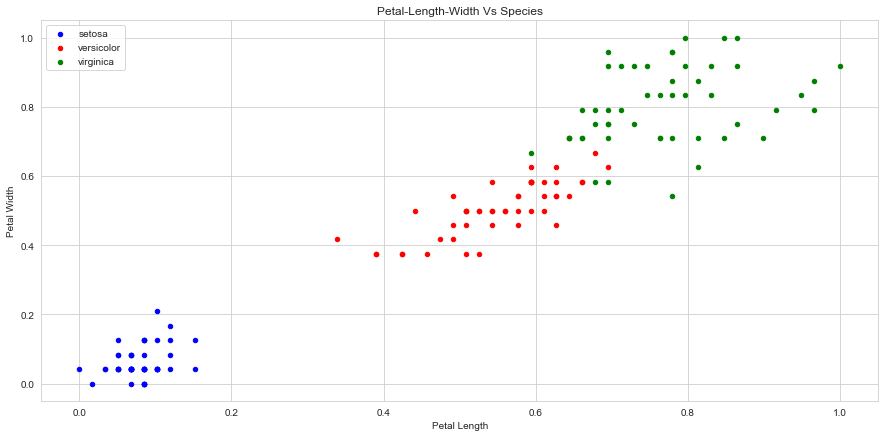

In [5]:
# Second find relationship between Petal length and width vs Species types
iris = df_iris
pet_len_wid = iris[iris.Species == 'Iris-setosa'].plot(kind = 'scatter', x = 'PetalLengthCm', y = 'PetalWidthCm'
,color = 'blue', label = 'setosa')
iris[iris.Species == 'Iris-versicolor'].plot(kind = 'scatter', x = 'PetalLengthCm', y = 'PetalWidthCm', color = 'red'
,label = 'versicolor', ax = pet_len_wid)
iris[iris.Species == 'Iris-virginica'].plot(kind = 'scatter', x = 'PetalLengthCm', y = 'PetalWidthCm', color = 'green'
,label = 'virginica', ax = pet_len_wid)
pet_len_wid.set_xlabel('Petal Length')
pet_len_wid.set_ylabel('Petal Width')
pet_len_wid.set_title('Petal-Length-Width Vs Species')
pet_len_wid = plt.gcf()
pet_len_wid.set_size_inches(15, 7)
plt.show()

C:\Users\User\anaconda3\lib\site-packages\seaborn\axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


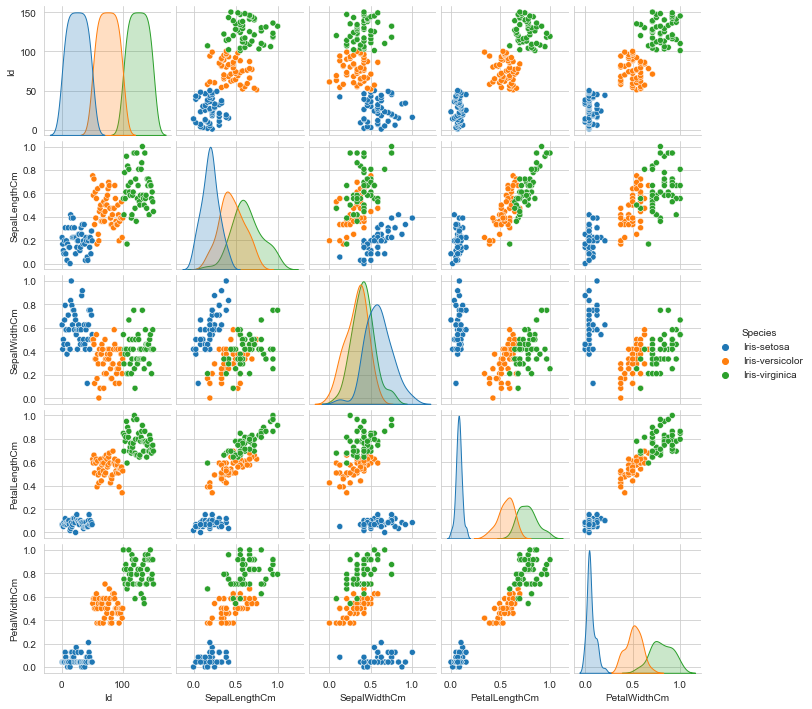

In [6]:
# Scatter plots of all pairs of attributes
plt.close()
sns.pairplot(iris, hue = 'Species', size = 2, diag_kind = 'kde')
plt.show()

## Custom function for Recall, Precision, F1 and Plot_fig w.r.t Datasets

In [10]:
from keras import backend as K

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

def plot_fig(i, history):
    fig = plt.figure()
    plt.plot(range(1,epochs+1),history.history['val_accuracy'],label='validation')
    plt.plot(range(1,epochs+1),history.history['accuracy'],label='training')
    plt.legend(loc=0)
    plt.xlabel('epochs')
    plt.ylabel('accuracy')
    plt.xlim([1,epochs])
#     plt.ylim([0,1])
    plt.grid(True)
    plt.title("Model Accuracy")
    plt.show()
    fig.savefig('img/'+str(i)+'-accuracy.jpg')
    plt.close(fig)

## Model Initialization

In [56]:
import tensorflow as tf

nin = len(numerical)
nh  = 512
nout = 3
epochs = 100 
batch_size = 10

def create_model():
  return tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(nin, )),
    tf.keras.layers.Dense(nh, activation=activation),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(nout, activation='softmax')
  ])

## Testing best AF w.r.t the Datasets without Grid Search

Epoch 1/100
12/12 [==============================] - 4s 50ms/step - loss: 0.8137 - accuracy: 0.5778 - f1_m: 0.3982 - precision_m: 0.4176 - recall_m: 0.3836 - val_loss: 0.3531 - val_accuracy: 0.9474 - val_f1_m: 0.9500 - val_precision_m: 0.9500 - val_recall_m: 0.9500
Epoch 2/100
12/12 [==============================] - 0s 8ms/step - loss: 0.3996 - accuracy: 0.8747 - f1_m: 0.8720 - precision_m: 0.8757 - recall_m: 0.8687 - val_loss: 0.2149 - val_accuracy: 0.9737 - val_f1_m: 0.9750 - val_precision_m: 0.9750 - val_recall_m: 0.9750
Epoch 3/100
12/12 [==============================] - ETA: 0s - loss: 0.3404 - accuracy: 1.0000 - f1_m: 1.0000 - precision_m: 1.0000 - recall_m: 1.00 - 0s 7ms/step - loss: 0.3316 - accuracy: 0.8427 - f1_m: 0.8449 - precision_m: 0.8449 - recall_m: 0.8449 - val_loss: 0.2360 - val_accuracy: 0.9211 - val_f1_m: 0.9250 - val_precision_m: 0.9250 - val_recall_m: 0.9250
Epoch 4/100
12/12 [==============================] - 0s 11ms/step - loss: 0.3229 - accuracy: 0.8191 - f1_m

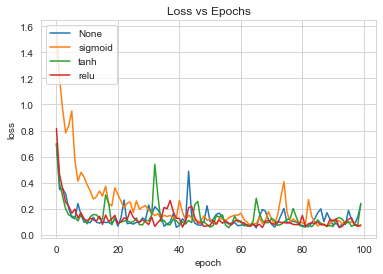

In [66]:
# fit model using Adam optimizer
for activation in [None, 'sigmoid', 'tanh', 'relu']:
    model = create_model()
    opt = optimizers.Adam(lr=0.01, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
    model.compile(optimizer=opt,
                  loss='categorical_crossentropy',
                  metrics=['accuracy',f1_m,precision_m, recall_m])
    history = model.fit(X_train_i, y_train_i,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(X_test_i, y_test_i))
    plt.plot(history.history['loss'])
loss_4, accuracy_4, f1_score_4, precision_4, recall_4 = model.evaluate(X_test_i, y_test_i, verbose=0)

plt.title('Loss vs Epochs')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['None', 'sigmoid', 'tanh', 'relu'], loc='upper left')

## Final parameter values for Layers in the Models

In [32]:
import json
layer_ = 1
model = create_model()
print("Initial Parameters")
print("----------"*3)
for layer in model.layers:
    g=layer.get_config()
    print('Layer: {}'.format(layer_))
    print("----------"*3)
    print (json.dumps(g, indent=2, default=str))
    layer_ += 1
    print("----------"*3)

Initial Parameters
------------------------------
Layer: 1
------------------------------
{
  "name": "flatten_12",
  "trainable": true,
  "batch_input_shape": [
    null,
    4
  ],
  "dtype": "float32",
  "data_format": "channels_last"
}
------------------------------
Layer: 2
------------------------------
{
  "name": "dense_27",
  "trainable": true,
  "dtype": "float32",
  "units": 512,
  "activation": "relu",
  "use_bias": true,
  "kernel_initializer": {
    "class_name": "GlorotUniform",
    "config": {
      "seed": null
    }
  },
  "bias_initializer": {
    "class_name": "Zeros",
    "config": {}
  },
  "kernel_regularizer": null,
  "bias_regularizer": null,
  "activity_regularizer": null,
  "kernel_constraint": null,
  "bias_constraint": null
}
------------------------------
Layer: 3
------------------------------
{
  "name": "dropout_13",
  "trainable": true,
  "dtype": "float32",
  "rate": 0.2,
  "noise_shape": null,
  "seed": null
}
------------------------------
Layer: 4


<class 'list'>


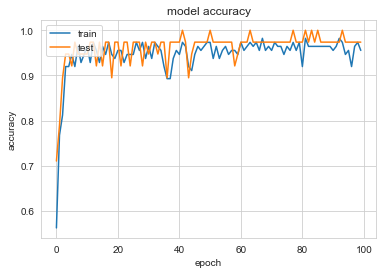

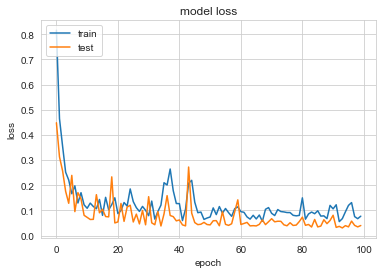

In [67]:
print(type(history.history['accuracy']))

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [68]:
f1_score_4

0.984375

## Save the model and its weights with custom function for future usage

In [75]:
model.save(r"C:\Users\User\Downloads\iris.h5")
model.save_weights(r"C:\Users\User\Downloads\iris_weights")
model.load_weights(r"C:\Users\User\Downloads\iris.h5")

# Recreate the exact same model, including its weights and the optimizer
dependencies = {
    'f1_m': f1_m,
    'precision_m':precision_m,
    'recall_m':recall_m,
}
model.load_weights(r"C:\Users\User\Downloads\iris_weights")
new_model = tf.keras.models.load_model(r"C:\Users\User\Downloads\iris.h5", custom_objects=dependencies)
new_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc', f1_m, precision_m, recall_m])
# Show the model architecture
new_model.summary()

loss_4, accuracy_4, f1_score_4, precision_4, recall_4 = new_model.evaluate(X_test_i, y_test_i, verbose=0)

print("Loss: " + str(loss_4))
print("Accuracy: " + str(accuracy_4))
print("F1 Score: " + str(f1_score_4))
print("Precision: " + str(precision_4))
print("Recall: " + str(recall_4))

Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_21 (Flatten)         (None, 4)                 0         
_________________________________________________________________
dense_45 (Dense)             (None, 512)               2560      
_________________________________________________________________
dropout_22 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_46 (Dense)             (None, 3)                 1539      
Total params: 4,099
Trainable params: 4,099
Non-trainable params: 0
_________________________________________________________________
Loss: 0.03976564481854439
Accuracy: 0.9736841917037964
F1 Score: 0.984375
Precision: 0.984375
Recall: 0.984375
